In [32]:
# import os
# import random
# import shutil

# # Set the path for your image folder
# image_folder = 'E:/CNN Personal Practise/MonkeyPox Skin Disease/train/Monkeypox'

# # Set the number of images you want in your test set
# num_test_images = 40

# # Set the destination folder for the test images
# test_set_folder = 'E:/CNN Personal Practise/MonkeyPox Skin Disease/test/Monkeypox'

# # Create the destination folder if it doesn't exist
# if not os.path.exists(test_set_folder):
#     os.makedirs(test_set_folder)

# # Get a list of all image files in the image folder
# image_files = [filename for filename in os.listdir(image_folder) if filename.endswith('.jpg') or filename.endswith('.png')]

# # Randomly select images for the test set
# test_images = random.sample(image_files, num_test_images)

# # Move the selected images to the destination folder
# for image in test_images:
#     src = os.path.join(image_folder, image)
#     dst = os.path.join(test_set_folder, image)
#     shutil.copy(src, dst)

# print(f"{num_test_images} images saved to the destination folder.")


In [ ]:
# Define the root directory
# root_dir = 'E:/CNN Personal Practise/MonkeyPox Skin Disease'
# # Get the class names
# class_names = os.listdir(root_dir)

# # Create directories for the training, validation, and testing sets
# train_dir = 'E:/CNN Personal Practise/MonkeyPox Skin Disease/train'
# val_dir = 'E:/CNN Personal Practise/MonkeyPox Skin Disease/val'
# test_dir = 'E:/CNN Personal Practise/MonkeyPox Skin Disease/test'

# os.makedirs(train_dir, exist_ok=True)
# os.makedirs(val_dir, exist_ok=True)
# os.makedirs(test_dir, exist_ok=True)

# # Split the filenames in each class directory into training, validation, and testing sets
# for class_name in class_names:
#     class_dir = os.path.join(root_dir, class_name)
#     filenames = os.listdir(class_dir)
#     train_filenames, test_filenames = train_test_split(filenames, test_size=0.2, random_state=42)
#     train_filenames, val_filenames = train_test_split(train_filenames, test_size=0.25, random_state=42)
    
#     # Create directories for the class in the training, validation, and testing sets
#     train_class_dir = os.path.join(train_dir, class_name)
#     val_class_dir = os.path.join(val_dir, class_name)
#     test_class_dir = os.path.join(test_dir, class_name)
    
#     os.makedirs(train_class_dir, exist_ok=True)
#     os.makedirs(val_class_dir, exist_ok=True)
#     os.makedirs(test_class_dir, exist_ok=True)
    
#     # Copy the images to the class directories in the training, validation, and testing sets
#     for filename in train_filenames:
#         src_path = os.path.join(class_dir, filename)
#         dst_path = os.path.join(train_class_dir, filename)
#         shutil.copyfile(src_path, dst_path)
    
#     for filename in val_filenames:
#         src_path = os.path.join(class_dir, filename)
#         dst_path = os.path.join(val_class_dir, filename)
#         shutil.copyfile(src_path, dst_path)
    
#     for filename in test_filenames:
#         src_path = os.path.join(class_dir, filename)
#         dst_path = os.path.join(test_class_dir, filename)
#         shutil.copyfile(src_path, dst_path)

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [59]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory='E:/CNN Personal Practise/MonkeyPox Skin Disease/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)


Found 770 files belonging to 4 classes.


In [7]:
validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    directory = 'E:/CNN Personal Practise/MonkeyPox Skin Disease/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)    
)

Found 120 files belonging to 4 classes.


In [56]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from shutil import copyfile

# Set the paths for your original dataset and preprocessed dataset
original_dataset_dir = 'E:/CNN Personal Practise/MonkeyPox Skin Disease/train'
preprocessed_dataset_dir = 'E:/CNN Personal Practise/MonkeyPox Skin Disease/preprocessed'

# Create the preprocessed dataset directory if it doesn't exist
if not os.path.exists(preprocessed_dataset_dir):
    os.makedirs(preprocessed_dataset_dir)

# Set the desired image size for preprocessing
image_size = (256, 256)

# Initialize an ImageDataGenerator for preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values between 0 and 1
    rotation_range=20,  # Randomly rotate images within the range of 20 degrees
    width_shift_range=0.2,  # Randomly shift the width of images by 20% of the total width
    height_shift_range=0.2,  # Randomly shift the height of images by 20% of the total height
    horizontal_flip=True  # Randomly flip images horizontally
)

# Generate preprocessed images and save them to the destination folder
image_folder = os.path.join(original_dataset_dir, 'Normal')
preprocessed_folder = preprocessed_dataset_dir

# Create the preprocessed Monkeypox folder if it doesn't exist
preprocessed_monkeypox_folder = os.path.join(preprocessed_folder, 'Normal')
if not os.path.exists(preprocessed_monkeypox_folder):
    os.makedirs(preprocessed_monkeypox_folder)

# Preprocess and save the images
for filename in os.listdir(image_folder):
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        img_path = os.path.join(image_folder, filename)
        img = load_img(img_path, target_size=image_size)
        img_array = img_to_array(img)
        img_array = img_array.reshape((1,) + img_array.shape)
        i = 0
        for batch in datagen.flow(img_array, batch_size=1, save_to_dir=preprocessed_monkeypox_folder, save_prefix='preprocessed_Normal', save_format='jpeg'):
            i += 1
            if i >= 1:  # Generate a single preprocessed image per original image
                break

# Check if the images are preprocessed and saved successfully
if len(os.listdir(preprocessed_monkeypox_folder)) > 0:
    print("Preprocessing and saving images successful.")
else:
    print("No images preprocessed or saved.")


Preprocessing and saving images successful.


In [60]:
preprocessed_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory='E:/CNN Personal Practise/MonkeyPox Skin Disease/preprocessed',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)


Found 760 files belonging to 4 classes.


In [61]:
def normalise(image, label):
    image = tf.cast(image/255, tf.float32)
    return image, label

preprocessed_ds = preprocessed_ds.map(normalise)
validation_ds = validation_ds.map(normalise)

In [62]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(4, activation='softmax'))


In [63]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 batch_normalization_10 (Bat  (None, 127, 127, 32)     128       
 chNormalization)                                                
                                                                 
 dropout_10 (Dropout)        (None, 127, 127, 32)      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 64)      

In [72]:
preprocessed_ds = preprocessed_ds.map(lambda x, y: (x, tf.one_hot(y, depth=4)))
validation_ds = validation_ds.map(lambda x, y: (x, tf.one_hot(y, depth=4)))

In [73]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [74]:
history = model.fit(preprocessed_ds, epochs=15, validation_data=validation_ds)

Epoch 1/15
24/24 [==============================] - 29s 1s/step - loss: 1.8274 - accuracy: 0.3868 - val_loss: 1.6375 - val_accuracy: 0.3333
Epoch 2/15
24/24 [==============================] - 25s 1s/step - loss: 1.4313 - accuracy: 0.4697 - val_loss: 1.8643 - val_accuracy: 0.3333
Epoch 3/15
24/24 [==============================] - 25s 1s/step - loss: 1.2962 - accuracy: 0.5342 - val_loss: 1.6190 - val_accuracy: 0.3333
Epoch 4/15
24/24 [==============================] - 26s 1s/step - loss: 1.1817 - accuracy: 0.5684 - val_loss: 2.0124 - val_accuracy: 0.3333
Epoch 5/15
24/24 [==============================] - 25s 1s/step - loss: 1.1584 - accuracy: 0.5395 - val_loss: 2.1508 - val_accuracy: 0.3333
Epoch 6/15
24/24 [==============================] - 26s 1s/step - loss: 1.0819 - accuracy: 0.6053 - val_loss: 2.2325 - val_accuracy: 0.3333
Epoch 7/15
24/24 [==============================] - 26s 1s/step - loss: 0.9833 - accuracy: 0.6263 - val_loss: 2.2885 - val_accuracy: 0.3333
Epoch 8/15
24/24 [==

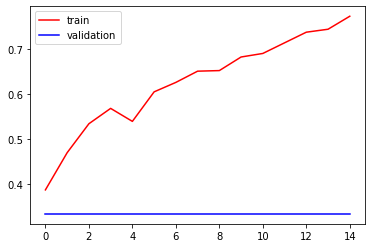

In [75]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

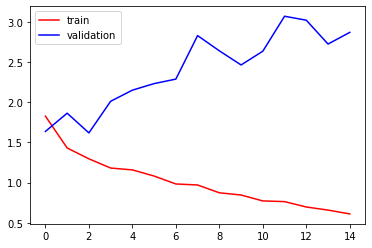

In [76]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [77]:
import cv2

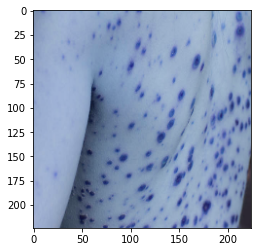

In [80]:
test_img1 = cv2.imread('E:/CNN Personal Practise/MonkeyPox Skin Disease/test/Chickenpox/chickenpox70.png')
plt.imshow(test_img1)

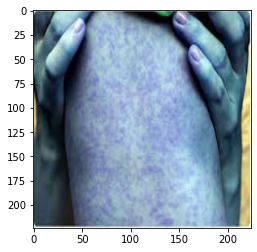

In [81]:
test_img2 = cv2.imread('E:/CNN Personal Practise/MonkeyPox Skin Disease/test/Measles/measles44.png')
plt.imshow(test_img2)

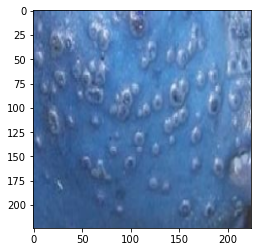

In [85]:
test_img3 = cv2.imread('E:/CNN Personal Practise/MonkeyPox Skin Disease/test/Monkeypox/monkeypox214.png')
plt.imshow(test_img3)

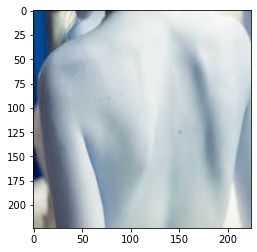

In [87]:
test_img4 = cv2.imread('E:/CNN Personal Practise/MonkeyPox Skin Disease/test/Normal/normal10.png')
plt.imshow(test_img4)

In [93]:
test_img1.shape

(256, 256, 3)

In [94]:
test_img2.shape

(256, 256, 3)

In [95]:
test_img3.shape

(256, 256, 3)

In [96]:
test_img4.shape

(256, 256, 3)

In [97]:
test_img1 = cv2.resize(test_img1,(256,256))
test_img2 = cv2.resize(test_img2,(256,256))
test_img3 = cv2.resize(test_img3,(256,256))
test_img4 = cv2.resize(test_img4,(256,256))

In [98]:
test_input1 = test_img1.reshape((1,256,256,3))
test_input2 = test_img2.reshape((1,256,256,3))
test_input3 = test_img3.reshape((1,256,256,3))
test_input4 = test_img4.reshape((1,256,256,3))

In [112]:
#Chickenpox
model.predict(test_input1)

1/1 [==============================] - 0s 56ms/step


array([[0., 0., 0., 1.]], dtype=float32)

In [107]:
#Measles
model.predict(test_input2)

1/1 [==============================] - 0s 54ms/step

array([[0., 1., 0., 0.]], dtype=float32)


In [110]:
#Monkeypox
model.predict(test_input3)

1/1 [==============================] - 0s 55ms/step

array([[1., 0., 0., 0.]], dtype=float32)


In [111]:
#Normal
model.predict(test_input4)

1/1 [==============================] - 0s 52ms/step

array([[0., 1., 0., 0.]], dtype=float32)


In [113]:
# model is still not accurate
# showing same result for measles and normal as shown